# Final Project Submission

Please fill out:
* Student name: Bradley Azegele 
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!

## Overview

This project investigates the factors affecting prices of houses in King County, Washington.

## Business Understanding

To identify how house prices are affected by various factors and to provide a guide on how to best identify properties that bear a high resell value for to maximize on profit margins.

## EDA

Preparing daataa for plotting using Tableau


In [2]:
#import all necessary libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [3]:
#import the data
data = pd.read_csv("data/kc_house_data.csv")


### Column Names and Descriptions for King County Data Set
* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each condition code
* `grade` - Overall grade of the house. Related to the construction and design of the house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each building grade code
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `zipcode` - ZIP Code used by the United States Postal Service
* `lat` - Latitude coordinate
* `long` - Longitude coordinate
* `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors
* `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors



In [4]:
data.head() #first 5 entries

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
data.isna().sum() #check for nulls

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [6]:
data["waterfront"].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [7]:
data["yr_renovated"].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [8]:
data["view"].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [9]:
#fill all null values with most common value
data = data.fillna({"waterfront": "NO" , \
                    "yr_renovated": 0.0, \
                    "view" : "NONE"})

In [10]:
# checking if data types match description ie numerical and strings categories
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  object 
 9   view           21597 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [11]:
data["sqft_basement"].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
143.0         1
935.0         1
1284.0        1
2730.0        1
207.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [12]:
data["sqft_basement"] = data["sqft_basement"].replace\
                        (to_replace="?",value="0.0").astype(float)

In [13]:
data["view"] = data["view"].astype("category")
data["view"].value_counts()

NONE         19485
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [14]:
data["condition"] = data["condition"].astype("category")
data["condition"].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [15]:
data["grade"]= data["grade"].astype("category")
data["grade"].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

Interact with visual here: https://public.tableau.com/views/KingCountyHousing_16643081903370/Sheet1?:language=en-GB&publish=yes&:display_count=n&:origin=viz_share_link

In [16]:
data_viz = data
data_viz.to_excel("data/Graphing_data/visuals.xlsx")

### Visualisations of displaying corellation of various conditions to price
The average line highlights where most values reside.

   #### Standard deviation of Price by zipcode
   
<div class='tableauPlaceholder' id='viz1664392872997' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ki&#47;KingCountyHousingVisuals&#47;Map&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='KingCountyHousingVisuals&#47;Map' /><param name='tabs' value='yes' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ki&#47;KingCountyHousingVisuals&#47;Map&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-GB' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1664392872997');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

Interact with visual here: https://public.tableau.com/views/KingCountyHousingVisuals/Map?:language=en-GB&publish=yes&:display_count=n&:origin=viz_share_link

   #### Price to number of bedrooms
   The graph shows median price per bedroom count highlighting the average house price with a 95% confidence interval (average)
   
<img src="data/Graphs/price_comp/Bedrooms.png">


Interact with visual here: https://public.tableau.com/views/KingCountyHousingVisuals/Bedrooms?:language=en-GB&publish=yes&:display_count=n&:origin=viz_share_link

   #### Price to number of bathrooms
   The graph shows median price per bathroom count highlighting the average house price 95% confidence interval
   
<img src="data/Graphs/price_comp/Bathrooms.png">

Interact with visual here: https://public.tableau.com/views/KingCountyHousingVisuals/Bathrooms?:language=en-GB&publish=yes&:display_count=n&:origin=viz_share_link

   #### Price to sqft_living
   The graph shows median price to sqft_living highlighting the average house price with 95% confidence interval
   
<img src="data/Graphs/price_comp/Sqft_living.png">

Interact with visual here: https://public.tableau.com/views/KingCountyHousingVisuals/Sqft_living?:language=en-GB&publish=yes&:display_count=n&:origin=viz_share_link

   #### Price to sqft_lot
   The graph shows median price to sqtf_lot highlighting the average house price with a 95% confidence interval (average)
   
<img src="data/Graphs/price_comp/Sqft_lot.png">

Interact with visual here: https://public.tableau.com/views/KingCountyHousingVisuals/Sqft_lot?:language=en-GB&publish=yes&:display_count=n&:origin=viz_share_link

   #### Price to number of floors
   The graph shows median price to number of floors highlighting the average house price with a 95% confidence interval (average)
   
<img src="data/Graphs/price_comp/Floors.png">

Interact with visual here: https://public.tableau.com/views/KingCountyHousingVisuals/Floors?:language=en-GB&publish=yes&:display_count=n&:origin=viz_share_link

   #### Price to Watefront(Y/N)
   The graph shows median price to the presence or absence of a watergront with average house price with a 95% confidence interval (average)
   
<img src="data/Graphs/price_comp/Waterfront.png">

Interact with visual here: https://public.tableau.com/views/KingCountyHousingVisuals/Waterfront?:language=en-GB&publish=yes&:display_count=n&:origin=viz_share_link

   #### Price to View rating
   The graph shows median price to view rating highlighting the average house price with a 95% confidence interval (average)
   
<img src="data/Graphs/price_comp/View.png">

Interact with visual here: https://public.tableau.com/views/KingCountyHousingVisuals/Sheet1?:language=en-GB&publish=yes&:display_count=n&:origin=viz_share_link

   #### Price to Condition Rating
   The graph shows median price to condition rating highlighting the average house price with a 95% confidence interval (average)
   
<img src="data/Graphs/price_comp/Condition.png">

Interact with visual here: https://public.tableau.com/views/KingCountyHousingVisuals/Condition?:language=en-GB&publish=yes&:display_count=n&:origin=viz_share_link

   #### Price to Grade Rating
   The graph shows median price to grade rating highlighting the average house price with a 95% confidence interval (average)
   
<img src="data/Graphs/price_comp/Grade.png">
Interact with visual here: https://public.tableau.com/views/KingCountyHousingVisuals/Grade?:language=en-GB&publish=yes&:display_count=n&:origin=viz_share_link

   #### Price to Sqft Above
   The graph shows median price to sqft_above highlighting the average house price with a 95% confidence interval (average)
   
<img src="data/Graphs/price_comp/Sqft_above.png">

Interact with visual here: https://public.tableau.com/views/KingCountyHousingVisuals/Sqft_above?:language=en-GB&publish=yes&:display_count=n&:origin=viz_share_link

   #### Price to Sqft Basement
   The graph shows median price to sqft_basement highlighting the average house price with a 95% confidence interval (average)
   
<img src="data/Graphs/price_comp/Sqft_basement.png">

Interact with visual here: https://public.tableau.com/views/KingCountyHousingVisuals/Sqft_basement?:language=en-GB&publish=yes&:display_count=n&:origin=viz_share_link

   #### Price to Year Built
   The graph shows median price to condition rating highlighting the average house price with a 95% confidence interval (average)
   
<img src="data/Graphs/price_comp/Yr_built.png">

Interact with visual here: https://public.tableau.com/views/KingCountyHousingVisuals/yr_built?:language=en-GB&publish=yes&:display_count=n&:origin=viz_share_link

   #### Price to Year Renovated
   The graph shows median price to condition rating highlighting the average house price with a 95% confidence interval (average)
   
<img src="data/Graphs/price_comp/Yr_renovated.png">

Interact with visual here: https://public.tableau.com/views/KingCountyHousingVisuals/yr_renovated?:language=en-GB&publish=yes&:display_count=n&:origin=viz_share_link

   #### Price to Sqft Living15
   The graph shows median price to sqft_living15 highlighting the average house price with a 95% confidence interval (average)
   
<img src="data/Graphs/price_comp/Sqft_living15.png">

Interact with visual here: https://public.tableau.com/views/KingCountyHousingVisuals/Sqft_living15?:language=en-GB&publish=yes&:display_count=n&:origin=viz_share_link

   #### Correlation Matrix of Price
   

In [17]:
corr_matr = data.corr()

In [18]:
corr_matr.to_excel("data/Graphing_data/correlation.xlsx")

##### Correlation general
<img src="data/Graphs/Correlation.png">

##### Correlation price highlighted
<img src="data/Graphs/price_comp/Correlation_price_highlighted.png">

Interact with visual here: https://public.tableau.com/views/KingCountyHousing_16643081903370/Sheet1?:language=en-GB&publish=yes&:display_count=n&:origin=viz_share_link

###  Observations
From the analyses conducted above we can deduce that the factors mostly affecting selling price of a house are :

      * `sqft_living` - Square footage of living space in the home
      * `sqft_above` - Square footage of house apart from basement
      * `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors
      * `bathrooms` - Number of bathrooms
A check for multicollinearity is needed.

In [19]:
multico_features = []
multico_corr = []
def check_multico(feature):
    for idx, correlation in corr_matr[feature].iteritems():
        if correlation >= .80 and idx != feature:
            multico_features.append([feature, idx])
            multico_corr.append(correlation)

for feature in corr_matr:
    check_multico(feature)
multi_df = pd.DataFrame({"Correlations":multico_corr, "Features": multico_features}).sort_values(["Correlations"],
                                                                                                 ascending = False)
print("Multicollinear Features")
display(multi_df)

Multicollinear Features


,Correlations,Features
0,0.876448,"[sqft_living, sqft_above]"
1,0.876448,"[sqft_above, sqft_living]"


We can further narrow it down to 2 factors:

      * `sqft_living` - Square footage of living space in the home
      * `bathrooms` - Number of bathrooms
      
### Conclusion
Further analyses is necessary to investigate whether multicolinearity exists in more aspects of the data.

#### Multicollinearity

We need to clean the data before modelling by removing outliers. 

##### Removing Outliers and Modifying data types

/Users/AzegeleBradley/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


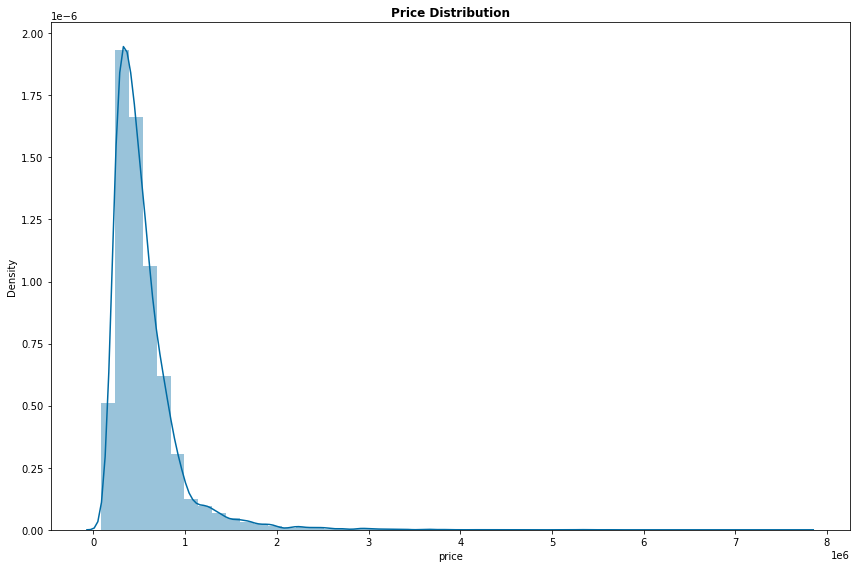

In [20]:
plt.figure(figsize=(12, 8))
plt.style.use("tableau-colorblind10")
sns.distplot(data["price"])
plt.title("Price Distribution",fontweight = "bold")
plt.tight_layout()

In [21]:
m_n = np.mean(data["price"])
std_dev = np.std(data["price"])
print(f"{m_n} is the mean of the price.")
print(f"{std_dev} is the standard deviation of the bedrooms.")

540296.5735055795 is the mean of the price.
367359.634929548 is the standard deviation of the bedrooms.


In [22]:
thresh = 3
outlier = []
for i in data["price"]:
    z = (i-m_n)/std_dev
    if z > thresh:
        outlier.append(i)
print(f"{min(outlier)} is our smallest outlier in price.")

1650000.0 is our smallest outlier in price.


In [23]:
data_clean = data

In [24]:
data_clean = data_clean[data["price"] <= min(outlier)]

In [25]:
data_clean["price"].max()

1650000.0

/Users/AzegeleBradley/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


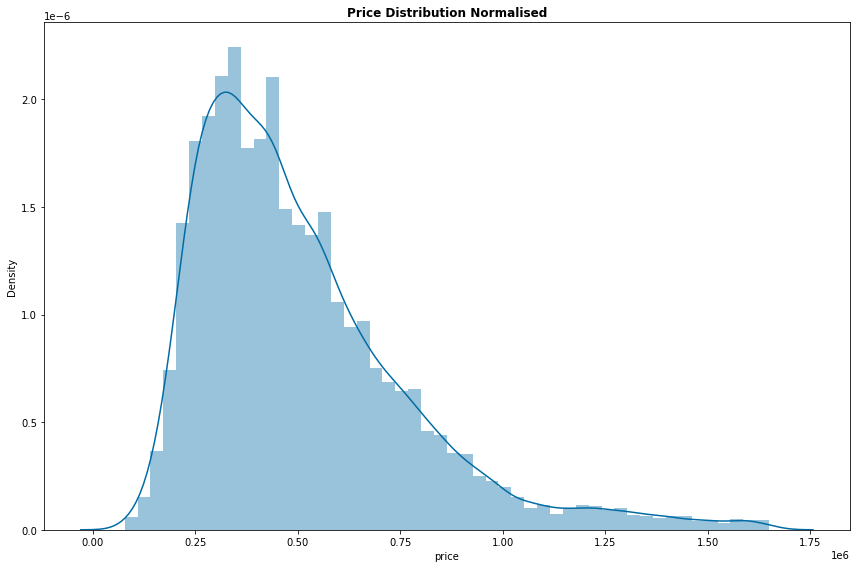

In [26]:
plt.figure(figsize=(12, 8))
plt.style.use("tableau-colorblind10")
sns.distplot(data_clean["price"])
plt.title("Price Distribution Normalised",fontweight = "bold")
plt.tight_layout()

/Users/AzegeleBradley/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


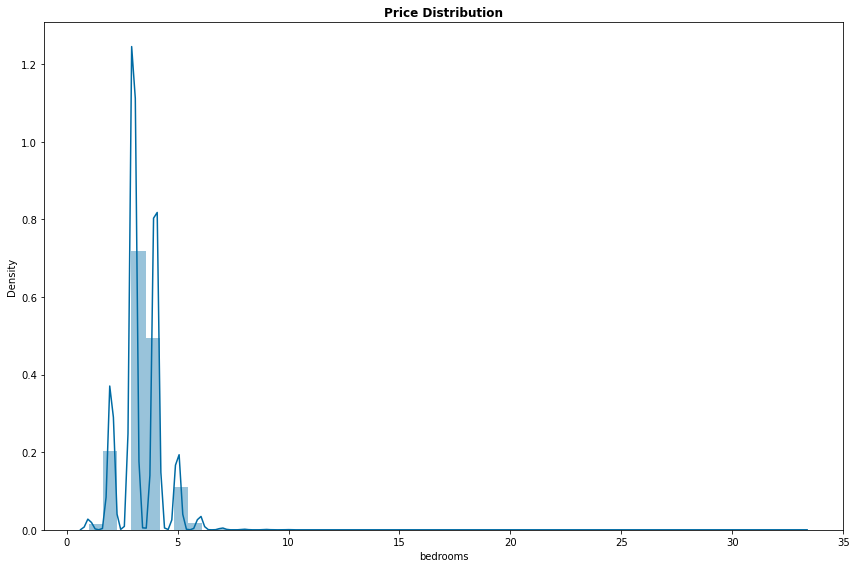

In [27]:
plt.figure(figsize=(12, 8))
plt.style.use("tableau-colorblind10")
sns.distplot(data_clean["bedrooms"])
plt.title("Price Distribution",fontweight = "bold")
plt.tight_layout()

/Users/AzegeleBradley/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


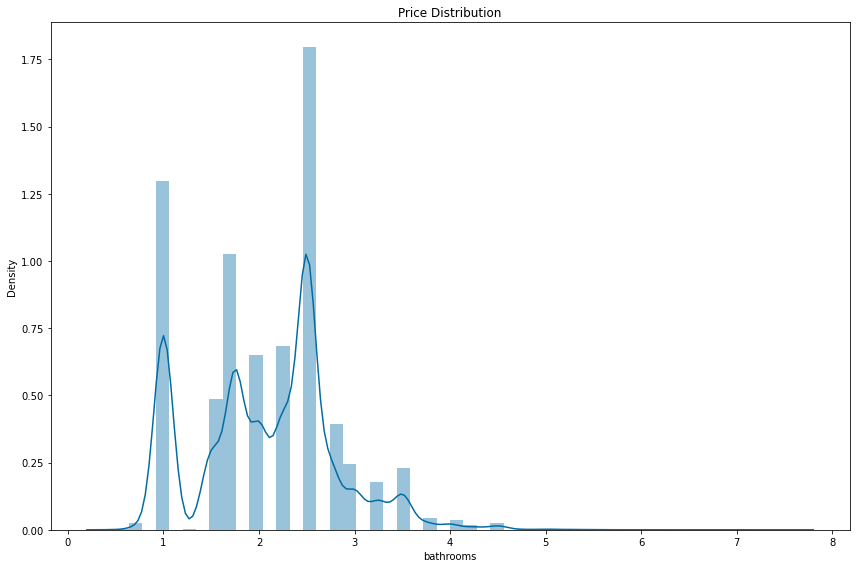

In [28]:
plt.figure(figsize=(12, 8))
plt.style.use("tableau-colorblind10")
sns.distplot(data_clean["bathrooms"])
plt.title("Price Distribution")
plt.tight_layout()

In [29]:
m_n = np.mean(data_clean["bedrooms"])
std_dev = np.std(data_clean["bedrooms"])
print(f"{m_n} is the mean of the bedrooms.")
print(f"{std_dev} is the standard deviation of the bedrooms.")

3.356816145612298 is the mean of the bedrooms.
0.9180853759793801 is the standard deviation of the bedrooms.


In [30]:
thresh = 3
outlier = []
for i in data_clean["bedrooms"]:
    z = (i-m_n)/std_dev
    if z > thresh:
        outlier.append(i)
print(f"{min(outlier)} is our smallest outlier in bedrooms.")

7 is our smallest outlier in bedrooms.


In [31]:
data_clean = data_clean[data_clean["bedrooms"] <= min(outlier)]

In [32]:
thresh = 3
outlier = []
for i in data["bathrooms"]:
    z = (i-m_n)/std_dev
    if z > thresh:
        outlier.append(i)
print(f"{min(outlier)} is our smallest outlier in bathrooms.")

6.25 is our smallest outlier in bathrooms.


In [33]:
data_clean = data_clean[data_clean["bathrooms"] <= min(outlier)]

/Users/AzegeleBradley/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


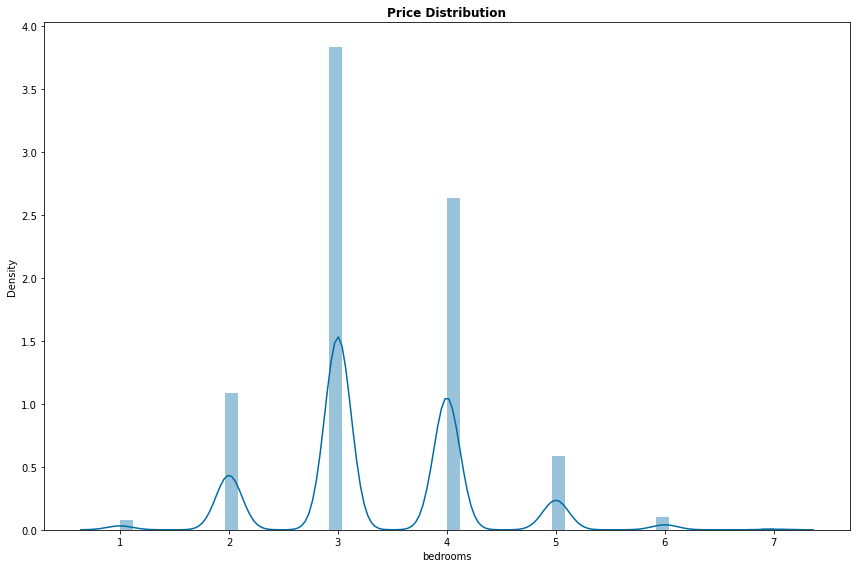

In [34]:
plt.figure(figsize=(12, 8))
plt.style.use("tableau-colorblind10")
sns.distplot(data_clean["bedrooms"])
plt.title("Price Distribution",fontweight = "bold")
plt.tight_layout()

In [35]:
data_clean = data_clean.drop(["id","date","floors","sqft_above","sqft_basement","yr_built","yr_renovated","zipcode","lat","long"],axis=1)

In [36]:
data_clean

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,NO,NONE,Average,7 Average,1340,5650
1,538000.0,3,2.25,2570,7242,NO,NONE,Average,7 Average,1690,7639
2,180000.0,2,1.00,770,10000,NO,NONE,Average,6 Low Average,2720,8062
3,604000.0,4,3.00,1960,5000,NO,NONE,Very Good,7 Average,1360,5000
4,510000.0,3,2.00,1680,8080,NO,NONE,Average,8 Good,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,NO,NONE,Average,8 Good,1530,1509
21593,400000.0,4,2.50,2310,5813,NO,NONE,Average,8 Good,1830,7200
21594,402101.0,2,0.75,1020,1350,NO,NONE,Average,7 Average,1020,2007
21595,400000.0,3,2.50,1600,2388,NO,NONE,Average,8 Good,1410,1287


In [37]:
data_clean["waterfront"]= data_clean["waterfront"].astype("category")

In [38]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21184 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   price          21184 non-null  float64 
 1   bedrooms       21184 non-null  int64   
 2   bathrooms      21184 non-null  float64 
 3   sqft_living    21184 non-null  int64   
 4   sqft_lot       21184 non-null  int64   
 5   waterfront     21184 non-null  category
 6   view           21184 non-null  category
 7   condition      21184 non-null  category
 8   grade          21184 non-null  category
 9   sqft_living15  21184 non-null  int64   
 10  sqft_lot15     21184 non-null  int64   
dtypes: category(4), float64(2), int64(5)
memory usage: 1.4 MB


In [39]:
data_clean["waterfront"].value_counts()

NO     21102
YES       82
Name: waterfront, dtype: int64

In [40]:
data_clean["waterfront"] = data_clean['waterfront'].replace(['NO', 'YES'], [0, 1])

In [41]:
data_clean["view"].value_counts()

NONE         19299
AVERAGE        903
GOOD           453
FAIR           308
EXCELLENT      221
Name: view, dtype: int64

In [42]:
data_clean["view"] = data_clean["view"].replace(["NONE", "AVERAGE", "GOOD", "FAIR", "EXCELLENT"], [0, 1, 2, 3, 4])

In [43]:
data_clean["condition"].value_counts()

Average      13755
Good          5582
Very Good     1649
Fair           169
Poor            29
Name: condition, dtype: int64

In [44]:
data_clean["condition"] = data_clean["condition"].replace\
(["Poor", "Fair", "Average", "Good", "Very Good"], [1, 2, 3, 4, 5]).astype('int64')


In [45]:
data_clean["grade"].value_counts()

7 Average        8959
8 Good           6045
9 Better         2554
6 Low Average    2038
10 Very Good     1003
11 Excellent      283
5 Fair            242
12 Luxury          32
4 Low              27
3 Poor              1
13 Mansion          0
Name: grade, dtype: int64

In [46]:
data_clean['grade'] =  data_clean["grade"].replace(["3 Poor", "4 Low","5 Fair", "6 Low Average", "7 Average",\
                    "8 Good", "9 Better", "10 Very Good", "11 Excellent", "12 Luxury", "13 Mansion"],\
                    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]).astype('int64')

#### Modelling

In [47]:
Mdl_1 = smf.ols(formula="price ~ grade", data=data_clean).fit()
Mdl_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                 1.748e+04
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        15:54:44   Log-Likelihood:            -2.8790e+05
No. Observations:               21184   AIC:                         5.758e+05
Df Residuals:                   21182   BIC:                         5.758e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -3.79e+05   6836.173    -55.440      0.000   -3.92e+05   -3.66e+05
grade       1.581e+05   1196.133    132.206      0.000    1.56e+05     1.6e+05
==============================================================================
Omnibus:                     4139.124   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9552.153
Skew:                           1.111   Prob(JB):                         0.00
Kurtosis:                       5.425   Cond. No.                         30.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
Mdl_2 = smf.ols(formula='price ~ grade + condition + view', data=data_clean).fit()
Mdl_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     7268.
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        15:54:44   Log-Likelihood:            -2.8677e+05
No. Observations:               21184   AIC:                         5.736e+05
Df Residuals:                   21180   BIC:                         5.736e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.661e+05   1.02e+04    -55.693      0.000   -5.86e+05   -5.46e+05
grade       1.559e+05   1167.438    133.549      0.000    1.54e+05    1.58e+05
condition    5.47e+04   1969.232     27.775      0.000    5.08e+04    5.86e+04
view        7.707e+04   2032.329     37.921      0.000    7.31e+04    8.11e+04
==============================================================================
Omnibus:                     3609.786   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8176.880
Skew:                           0.986   Prob(JB):                         0.00
Kurtosis:                       5.318   Cond. No.                         55.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
Mdl_3 = smf.ols(formula='price ~ grade + condition + view + sqft_living', data=data_clean).fit()
Mdl_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     6641.
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        15:54:44   Log-Likelihood:            -2.8566e+05
No. Observations:               21184   AIC:                         5.713e+05
Df Residuals:                   21179   BIC:                         5.714e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -4.33e+05      1e+04    -43.173      0.000   -4.53e+05   -4.13e+05
grade        9.857e+04   1621.628     60.784      0.000    9.54e+04    1.02e+05
condition    4.865e+04   1872.741     25.979      0.000     4.5e+04    5.23e+04
view         6.714e+04   1939.329     34.618      0.000    6.33e+04    7.09e+04
sqft_living   103.6725      2.141     48.418      0.000      99.476     107.869
==============================================================================
Omnibus:                     3419.632   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7931.464
Skew:                           0.931   Prob(JB):                         0.00
Kurtosis:                       5.349   Cond. No.                     1.87e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
Mdl_4 = smf.ols(formula=\
                'price ~ grade + condition + view + sqft_living + waterfront +sqft_lot + bedrooms + bathrooms',\
                data=data_clean).fit()
Mdl_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     3384.
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        15:54:44   Log-Likelihood:            -2.8555e+05
No. Observations:               21184   AIC:                         5.711e+05
Df Residuals:                   21175   BIC:                         5.712e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3.878e+05   1.08e+04    -35.933      0.000   -4.09e+05   -3.67e+05
grade        9.776e+04   1677.893     58.265      0.000    9.45e+04    1.01e+05
condition    4.905e+04   1875.833     26.150      0.000    4.54e+04    5.27e+04
view         5.917e+04   2057.360     28.761      0.000    5.51e+04    6.32e+04
sqft_living   125.3277      2.769     45.257      0.000     119.900     130.756
waterfront   1.738e+05   2.04e+04      8.538      0.000    1.34e+05    2.14e+05
sqft_lot       -0.1243      0.030     -4.188      0.000      -0.183      -0.066
bedrooms    -1.728e+04   1757.805     -9.832      0.000   -2.07e+04   -1.38e+04
bathrooms    -1.23e+04   2506.779     -4.905      0.000   -1.72e+04   -7382.417
==============================================================================
Omnibus:                     3425.481   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8150.822
Skew:                           0.924   Prob(JB):                         0.00
Kurtosis:                       5.413   Cond. No.                     7.46e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.46e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
X = data_clean.drop(columns=["price"], axis=1)
y = data_clean["price"]

#Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=1000)

#Fit the model
linreg = LinearRegression()
model = linreg.fit(X_train, y_train)
model

#View model accuracy
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

print(f"Training Score: {round(train_score, 2)}")
print(f"Test Score: {round(test_score, 2)}")
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

#View model summary in statsmodels
X_train = sm.add_constant(X_train)
smmodel = sm.OLS(y_train, X_train).fit()
smmodel.summary()

Training Score: 0.57
Test Score: 0.56
Intercept: -400416.2520018151
Coefficients: [-1.74451147e+04 -1.13945305e+04  1.14180000e+02  1.07012606e-01
  1.96988667e+05  5.64803951e+04  5.13599142e+04  9.21993850e+04
  3.06114626e+01 -5.06954666e-01]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     2207.
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        15:54:45   Log-Likelihood:            -2.2839e+05
No. Observations:               16947   AIC:                         4.568e+05
Df Residuals:                   16936   BIC:                         4.569e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.004e+05   1.21e+04    -33.172      0.000   -4.24e+05   -3.77e+05
bedrooms      -1.745e+04   1959.783     -8.902      0.000   -2.13e+04   -1.36e+04
bathrooms     -1.139e+04   2799.816     -4.070      0.000   -1.69e+04   -5906.600
sqft_living     114.1800      3.428     33.309      0.000     107.461     120.899
sqft_lot          0.1070      0.048      2.230      0.026       0.013       0.201
waterfront      1.97e+05   2.33e+04      8.462      0.000    1.51e+05    2.43e+05
view           5.648e+04   2289.102     24.674      0.000     5.2e+04     6.1e+04
condition      5.136e+04   2098.752     24.472      0.000    4.72e+04    5.55e+04
grade           9.22e+04   1960.849     47.020      0.000    8.84e+04     9.6e+04
sqft_living15    30.6115      3.280      9.332      0.000      24.182      37.041
sqft_lot15       -0.5070      0.069     -7.304      0.000      -0.643      -0.371
==============================================================================
Omnibus:                     2747.877   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6641.112
Skew:                           0.920   Prob(JB):                         0.00
Kurtosis:                       5.453   Cond. No.                     8.69e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.69e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<ipython-input-52-742d5f188fef>:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


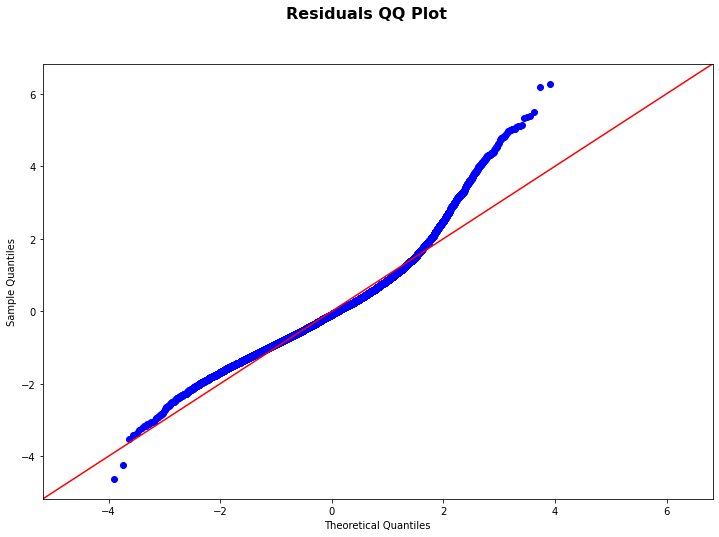

In [52]:
resids = Mdl_4.resid
fig = sm.graphics.qqplot(resids, dist=stats.norm, line='45', fit=True)
fig.suptitle('Residuals QQ Plot', fontsize=16, fontweight="bold")
fig.set_size_inches(12, 8)
fig.show()

In [53]:
Mdl_4.params.sort_values().round(4)

Intercept     -387753.0566
bedrooms       -17281.8828
bathrooms      -12295.8951
sqft_lot           -0.1243
sqft_living       125.3277
condition       49053.3048
view            59172.6419
grade           97762.0610
waterfront     173810.2037
dtype: float64

## Conclusions

The factors observed to affect house prices positively are:
              
              * `waterfront` - Whether the house is on a waterfront
              * `grade` - Overall grade of the house. Related to the construction and design of the house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each building grade code
              * `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
  
A positive in any 2 of these 3 means a house should be considered for renovation as it is it bears high yield attributes as a candidaate for flipping. 

On Waterfront houses within Zip Code 98039 - Medina, Washington State tend to sell at the best prices and in comparison to other places with waterfronts. Said houses also have a good view thus grade is a flexible aspect to consider as renovations could easily be done to increase retail value. 
It was also observed that recently renovated houses tend to sell at higher prices further stregnthening our argument on the flexibility of grade.

Bathrooms and bedroom count are a given with a positive bias towards more bathrooms over bedrooms in the event an extra room is to be converted to either of the two in the renovation process.



## Prospects

Social economic factors such as proximity to local ammenities like schools, administrative buildings and universities woulld shed more light to the information on factors affecting selling prices.
              